BATTLE OF THE NEIGHBOURHOODS PART I



1. Description of the problem & background


In [2]:

'''
When planning to set a business, usually "local" information is required. FOr instance, such area is popular for coffee shops.
ANd it is usually learnt by hearing it from other people.
The aim of this project would be to be able to gather that info on which areas are more popular for a specific type of venue
A KNN clustering will be performed, being the venue type the response variable, and latitude and longitude the predicting variables.


2. Description of the data used


In [49]:
'''
This project will work with the City of Buenos Aires.
ITs coordinates are taken with geocode, and from them, venues searches are performed with the foursquare API.


Thus, the database will have the venues IDs, their category, their latitude & longitude. 
With the result, a predicted venue type will be included as well. 

'''

'\nThis project will work with the City of Buenos Aires.\nITs coordinates are taken with geocode, and from them, venues searches are performed with the foursquare API.\n\nThus, the database will have the venues IDs, their category, their latitude & longitude. \n\n'

PROJECT CODE & EXECUTION


In [1]:
#import libraries & data
import json
import requests
import pandas as pd

cred = pd.read_csv('CRED.csv', header=None)
cred
CLIENT_ID = cred.iloc[0,1]
CLIENT_SECRET = cred.iloc[1,1]
 # your Foursquare Secret
VERSION =20180604
LIMIT = 100000
RADIUS = 100000
search_query = 'coffee'
limit = 1000
print('libraries imported & variables assigned')

libraries imported & variables assigned


In [2]:
#libraries
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


In [3]:
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode('Buenos Aires, Argentina')
#round coordinates as foursquare asks
lat= round(location.latitude, 2)
long = round(location.longitude, 2)

ll = lat, long
#URL = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={,}&query={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET,
                                                                                                            # VERSION,      lat, long,
                                                                                                             #search_query, RADIUS)  
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, search_query, RADIUS, limit)

response = requests.get(url).json()
print(type(response['response']['venues']))
print('number of results' , len(response['response']['venues']))
print('first element returned json:', response['response']['venues'][0])
response['response']['venues'][0]['location']['lng']

<class 'list'>
number of results 50
first element returned json: {'id': '542c714a498ed1d8ff638938', 'name': 'LAB Training Center and Coffee Shop', 'location': {'address': 'Humboldt 1542', 'crossStreet': 'e/ José Antonio Cabrera y Gorriti', 'lat': -34.58603451302501, 'lng': -58.436788294038855, 'labeledLatLngs': [{'label': 'display', 'lat': -34.58603451302501, 'lng': -58.436788294038855}], 'distance': 2683, 'postalCode': '1414', 'cc': 'AR', 'city': 'Buenos Aires', 'state': 'Buenos Aires C.F.', 'country': 'Argentina', 'formattedAddress': ['Humboldt 1542 (e/ José Antonio Cabrera y Gorriti)', '1414 Buenos Aires', 'Buenos Aires C.F.', 'Argentina']}, 'categories': [{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1553654758', 'hasPerk': False}


-58.436788294038855

In [5]:
#CREATE DATAFRAME WHERE DATA WILL BE STORED

df = pd.DataFrame(columns=['query', 'shop_id', 'lat', 'long'])
df

,query,shop_id,lat,long


In [6]:
shop_id = list()
shop_lat = list()
shop_long = list()
cat = []
for shop in response['response']['venues']:
    shop_id.append(shop['id'])
    shop_lat.append(shop['location']['lat'])
    shop_long.append(shop['location']['lng'])
    cat.append('Coffee')
df['shop_id'] = shop_id
df['lat'] = shop_lat
df['long'] = shop_long
df['query'] = cat

df
    

,query,shop_id,lat,long
0,Coffee,542c714a498ed1d8ff638938,-34.586035,-58.436788
1,Coffee,52d3bcfb498e67746ea04ff3,-34.606916,-58.425570
2,Coffee,4b59de07f964a5200d9d28e3,-34.589294,-58.427233
3,Coffee,5beca52ac876c8002c7c9cb2,-34.588005,-58.424984
4,Coffee,4bd4aa11637ba5934b31f570,-34.590940,-58.413317
5,Coffee,50b0b9f0e4b04cb0a21732d3,-34.619301,-58.372576
6,Coffee,4d75529f1a8aa35d9abb1ba7,-34.591427,-58.428108
7,Coffee,59872ec7002f4c7bc0dc28e9,-34.609218,-58.430373
8,Coffee,52191f9c498ea0a9890e73dd,-34.597423,-58.385589
9,Coffee,4b2fa645f964a5207bed24e3,-34.590718,-58.408127


In [7]:
#now the queries for 
search_query = 'iglesia' #spanish for church
                                                                                                             #search_query, RADIUS)  
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, search_query, RADIUS, limit)

response = requests.get(url).json()
response

print('number of results' , len(response['response']['venues']))
print('first element returned json:', response['response']['venues'][0])

number of results 50
first element returned json: {'id': '4d67d2ebcba6a35de469d1c1', 'name': 'Iglesia Universal del Reino de Dios', 'location': {'address': 'Av. Corrientes 4070', 'crossStreet': 'Av. Medrano', 'lat': -34.603025497605174, 'lng': -58.42312990332712, 'labeledLatLngs': [{'label': 'display', 'lat': -34.603025497605174, 'lng': -58.42312990332712}], 'distance': 1729, 'postalCode': '1194', 'cc': 'AR', 'city': 'Buenos Aires', 'state': 'Buenos Aires C.F.', 'country': 'Argentina', 'formattedAddress': ['Av. Corrientes 4070 (Av. Medrano)', '1194 Buenos Aires', 'Buenos Aires C.F.', 'Argentina']}, 'categories': [{'id': '4bf58dd8d48988d132941735', 'name': 'Church', 'pluralName': 'Churches', 'shortName': 'Church', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_church_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '68615501'}, 'referralId': 'v-1553654783', 'hasPerk': False}


In [8]:
#create empty dataframe
df2 = pd.DataFrame(columns=df.columns.values)
shop_id = list()
shop_lat = list()
shop_long = list()
cat = []
for shop in response['response']['venues']:
    shop_id.append(shop['id'])
    shop_lat.append(shop['location']['lat'])
    shop_long.append(shop['location']['lng'])
    cat.append('Church')
df2['shop_id'] = shop_id
df2['lat'] = shop_lat
df2['long'] = shop_long
df2['query'] = cat

df2
    

,query,shop_id,lat,long
0,Church,4d67d2ebcba6a35de469d1c1,-34.603025,-58.423130
1,Church,4db0990a1e729fcc5641ae06,-34.591895,-58.430681
2,Church,5241b41193cd62168b82e4b6,-34.616769,-58.421195
3,Church,4b696c48f964a520c1a12be3,-34.609920,-58.436684
4,Church,525ad8cb11d203eccb7b229a,-34.611596,-58.444065
5,Church,4e6418a7483bd9a9750c9353,-34.604338,-58.414285
6,Church,5158c888e4b020def14c89f3,-34.602445,-58.427527
7,Church,4f8988dee4b005c39134b01b,-34.612252,-58.445882
8,Church,4ebc19dce300a32c1881acdb,-34.620696,-58.370608
9,Church,4e6bc5eec65b5bef28f75ebe,-34.624311,-58.366645


In [11]:
#now concatenate both dataframes
df = pd.concat([df, df2], axis=0, ignore_index=True, sort=False)
df

,query,shop_id,lat,long
0,Coffee,542c714a498ed1d8ff638938,-34.586035,-58.436788
1,Coffee,52d3bcfb498e67746ea04ff3,-34.606916,-58.425570
2,Coffee,4b59de07f964a5200d9d28e3,-34.589294,-58.427233
3,Coffee,5beca52ac876c8002c7c9cb2,-34.588005,-58.424984
4,Coffee,4bd4aa11637ba5934b31f570,-34.590940,-58.413317
5,Coffee,50b0b9f0e4b04cb0a21732d3,-34.619301,-58.372576
6,Coffee,4d75529f1a8aa35d9abb1ba7,-34.591427,-58.428108
7,Coffee,59872ec7002f4c7bc0dc28e9,-34.609218,-58.430373
8,Coffee,52191f9c498ea0a9890e73dd,-34.597423,-58.385589
9,Coffee,4b2fa645f964a5207bed24e3,-34.590718,-58.408127


In [13]:
#NOW PERFORM THE KNN CLUSTERING
#the response, i.e. query, has to be encoded.

df['query'].replace('Church', 0, inplace=True)
df['query'].replace('Coffee', 1, inplace=True)
df['query'] = df['query'].astype(int)
df    

,query,shop_id,lat,long
0,1,542c714a498ed1d8ff638938,-34.586035,-58.436788
1,1,52d3bcfb498e67746ea04ff3,-34.606916,-58.425570
2,1,4b59de07f964a5200d9d28e3,-34.589294,-58.427233
3,1,5beca52ac876c8002c7c9cb2,-34.588005,-58.424984
4,1,4bd4aa11637ba5934b31f570,-34.590940,-58.413317
5,1,50b0b9f0e4b04cb0a21732d3,-34.619301,-58.372576
6,1,4d75529f1a8aa35d9abb1ba7,-34.591427,-58.428108
7,1,59872ec7002f4c7bc0dc28e9,-34.609218,-58.430373
8,1,52191f9c498ea0a9890e73dd,-34.597423,-58.385589
9,1,4b2fa645f964a5207bed24e3,-34.590718,-58.408127


In [22]:
#now define the predicting arrays
Y = df['query'].values
X = df[['lat','long']].values

'''Data Standardization give data zero mean and unit variance, it is good practice, 
especially for algorithms such as KNN which is based on distance of cases:'''

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.62606297, -0.32593932],
       [-0.21427474, -0.00352959],
       [ 0.49486809, -0.05130371],
       [ 0.5467627 ,  0.01332151],
       [ 0.42864656,  0.34863645]])

In [29]:
#now perform the KNN classiffication
#k is iterated from 1 to 10
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
a = 100
for k in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X,Y)
    acc = metrics.accuracy_score(Y, neigh.predict(X))
    if acc < a:
        a = acc
        model = neigh
print('Model specification', model)
print('Model accuracy:', acc)


model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')
acc 0.69
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


In [30]:
#other analyses

from sklearn.metrics import classification_report
classification_report(Y, model.predict(X))
                

'              precision    recall  f1-score   support\n\n           0       0.72      0.62      0.67        50\n           1       0.67      0.76      0.71        50\n\n   micro avg       0.69      0.69      0.69       100\n   macro avg       0.69      0.69      0.69       100\nweighted avg       0.69      0.69      0.69       100\n'

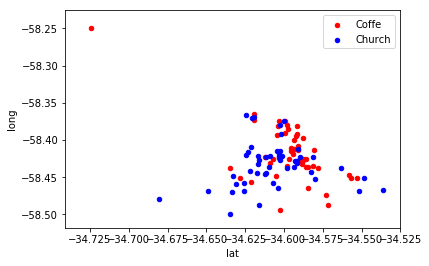

In [45]:
#original 
import matplotlib.pyplot as plt

ax = df.loc[df['query'] == 1].plot(x='lat', y='long', kind='scatter', color='r')
df.loc[df['query'] == 0].plot(ax=ax, x='lat', y='long', color='b', kind='scatter')
plt.legend(['Coffee', 'Church'])
plt.show()

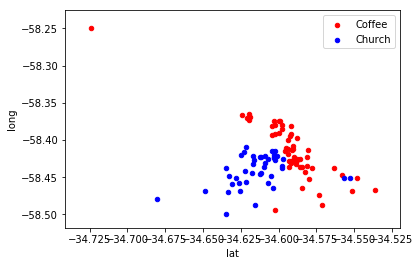

In [47]:
#now graph the with the clusters
df['prediction'] = model.predict(X)
ax = df.loc[df['prediction'] == 1].plot(x='lat', y='long', kind='scatter', color='r')
df.loc[df['prediction'] == 0].plot(ax=ax, x='lat', y='long', color='b', kind='scatter')
plt.legend(['Coffee', 'Church'])
plt.show()

In [48]:
df.to_csv('dati.csv')